In [18]:
import numpy as np
import seaborn as sns
import transformation
from pathlib import Path
import significantdigits as sd
from collections import Counter
from matplotlib import pyplot as plt
from fsl.transform import flirt, affine

import warnings
warnings.filterwarnings('ignore')

In [19]:
#remove all the numbers later 50, 10, 3 etc
import importlib
importlib.reload(transformation)

<module 'transformation' from '/lustre06/project/6061841/niusham/mca_linear_registration/transformation.py'>

In [20]:
# path_PD = './outputs_PD/anat-12dofs'
# path_HC = './outputs_HC/anat-12dofs'

path_PD = Path('./pipline/pd/outputs/anat-12dofs')
path_HC = Path('./pipline/hc/outputs/anat-12dofs')

In [21]:
paths_PD = transformation.get_matrices_paths(path_PD, Path("./PD_selected_subjects.txt"), pattern="_ses-BL")
paths_HC = transformation.get_matrices_paths(path_HC, Path("./HC_selected_subjects.txt"), pattern="_ses-BL")

In [22]:
mat_dic_PD, error_PD = transformation.get_matrices(paths_PD)
mat_dic_HC, error_HC = transformation.get_matrices(paths_HC)

In [23]:
error_PD, error_HC

([], [])

In [24]:
mean_PD, std_PD = np.zeros((50,4,4)), np.zeros((50,4,4))
mean_HC, std_HC = np.zeros((50,4,4)), np.zeros((50,4,4))

for i,sub in enumerate(mat_dic_PD.keys()):
    mean_PD[i] = np.mean(mat_dic_PD[sub]["mca"], axis=0)
    std_PD[i] = np.std(mat_dic_PD[sub]["mca"], axis=0)

for i,sub in enumerate(mat_dic_HC.keys()):
    mean_HC[i] = np.mean(mat_dic_HC[sub]['mca'], axis=0)
    std_HC[i] = np.std(mat_dic_HC[sub]["mca"], axis=0)


In [25]:
def cell_significant_digit(mat_dic):

    significant_digits_dict = {key:np.zeros((4,4)) for key in mat_dic.keys()}
    for key in mat_dic.keys():
        matrix = mat_dic[key]['mca']
        mean_sub = np.mean(matrix, axis=0)
        for i in range(4):
            for j in range(4):
                significant_digits_dict[key][i,j] = sd.significant_digits(matrix[:,i,j], reference=mean_sub[i,j], basis=10)
    
    return significant_digits_dict

In [26]:
cell_significant_digits_dict_PD = cell_significant_digit(mat_dic_PD)
cell_significant_digits_dict_HC = cell_significant_digit(mat_dic_HC)

In [27]:
cell_significant_digits_PD = np.array(list(cell_significant_digits_dict_PD.values()))
cell_significant_digits_HC = np.array(list(cell_significant_digits_dict_HC.values()))

In [28]:
np.max(cell_significant_digits_PD, axis=0)

array([[ 4.36322389,  2.41325873,  3.65072848,  3.18710843],
       [ 3.35817041,  3.95227435,  2.87620335,  3.37230713],
       [ 2.70499451,  3.30505676,  3.74174087,  3.00172415],
       [15.09990363, 15.09990363, 15.09990363, 15.09990363]])

In [29]:
np.max(cell_significant_digits_HC, axis=0)

array([[ 4.07742919,  2.41462272,  1.93317697,  2.36443501],
       [ 2.58063545,  3.93672643,  2.95242996,  2.71478049],
       [ 2.66081698,  3.33450377,  3.64529522,  2.641961  ],
       [15.09990363, 15.09990363, 15.09990363, 15.09990363]])

In [30]:
np.mean(cell_significant_digits_PD, axis=0)

array([[ 3.24552485,  1.2329296 ,  1.24346026,  1.64923142],
       [ 1.53417493,  3.20050041,  2.14506234,  2.16171789],
       [ 1.41555066,  2.75271937,  2.90599629,  2.02360553],
       [15.09990363, 15.09990363, 15.09990363, 15.09990363]])

In [31]:
np.mean(cell_significant_digits_HC, axis=0)

array([[ 3.25374615,  1.26200326,  1.10144623,  1.55383773],
       [ 1.65461715,  3.17086336,  2.17155632,  2.00848687],
       [ 1.40592752,  2.63179251,  3.02811607,  1.9289024 ],
       [15.09990363, 15.09990363, 15.09990363, 15.09990363]])

In [32]:
np.min(cell_significant_digits_PD, axis=0)

array([[ 1.2324824 , -0.47019661, -1.07024868,  0.21430974],
       [-1.01781593,  1.38690681,  0.84995407,  0.91060458],
       [-0.26617758,  0.93321072, -0.3553351 ,  0.37088834],
       [15.09990363, 15.09990363, 15.09990363, 15.09990363]])

In [33]:
np.min(cell_significant_digits_HC, axis=0)

array([[ 2.83107158, -0.55504235, -0.43240611,  0.23702599],
       [ 0.08259193,  2.37841215,  0.47138719,  0.19896421],
       [-0.51524834,  1.02471279,  2.03632779,  0.26977358],
       [15.09990363, 15.09990363, 15.09990363, 15.09990363]])

Text(0.5, 1.0, 'MCA means for each cell _PD subjects_')

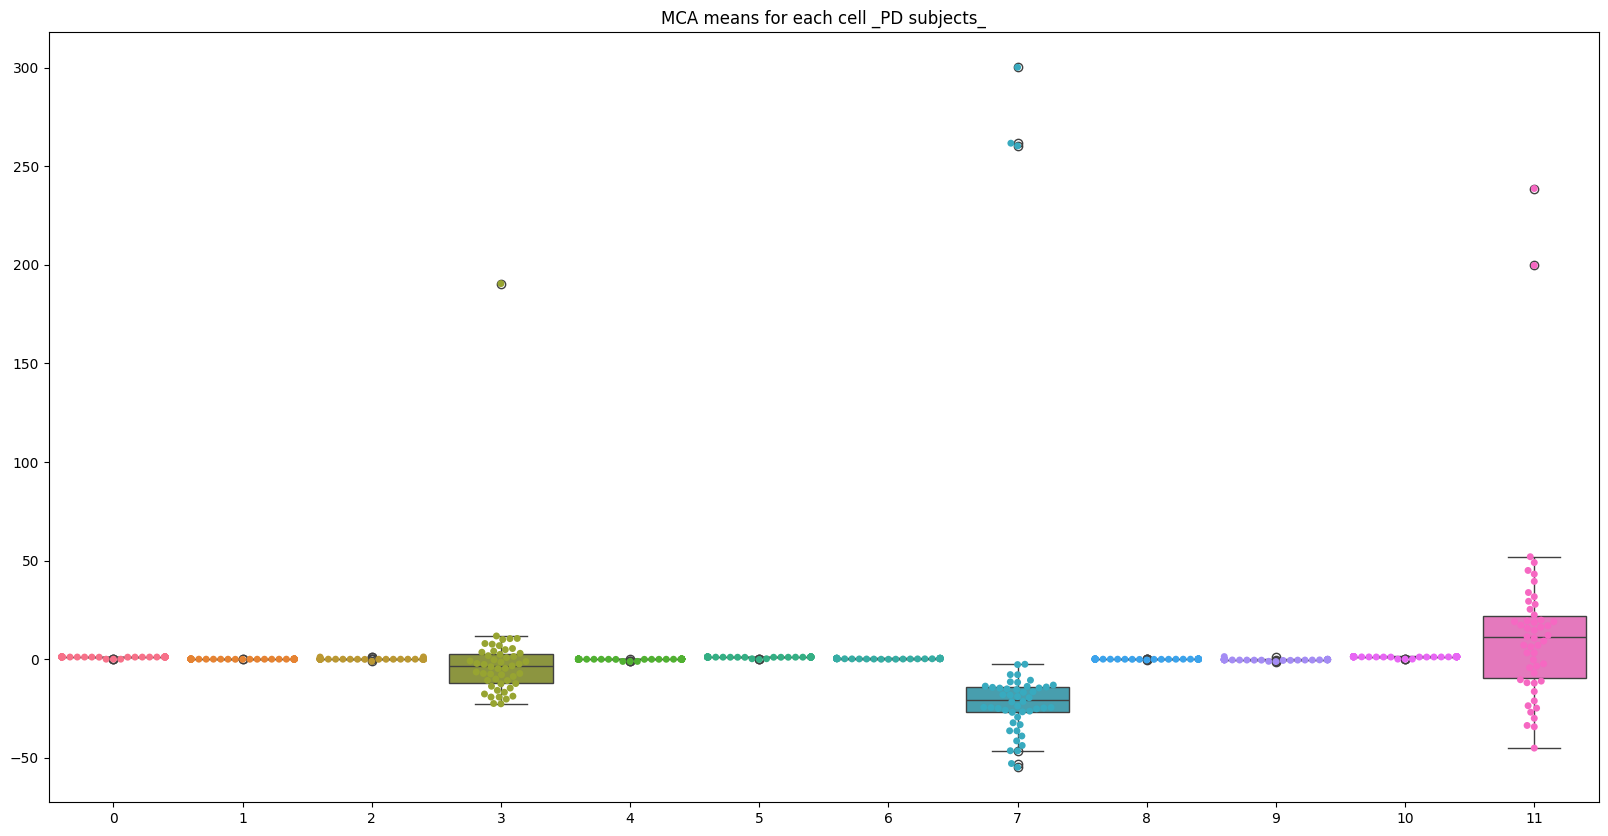

In [34]:
plt.figure(figsize=(20,10))
_ = sns.swarmplot(mean_PD[:,:3,:].reshape(50,12))
_ = sns.boxplot(mean_PD[:,:3,:].reshape(50,12))
plt.title('MCA means for each cell _PD subjects_')

Text(0.5, 1.0, 'MCA SD for each cell _PD subjects_')

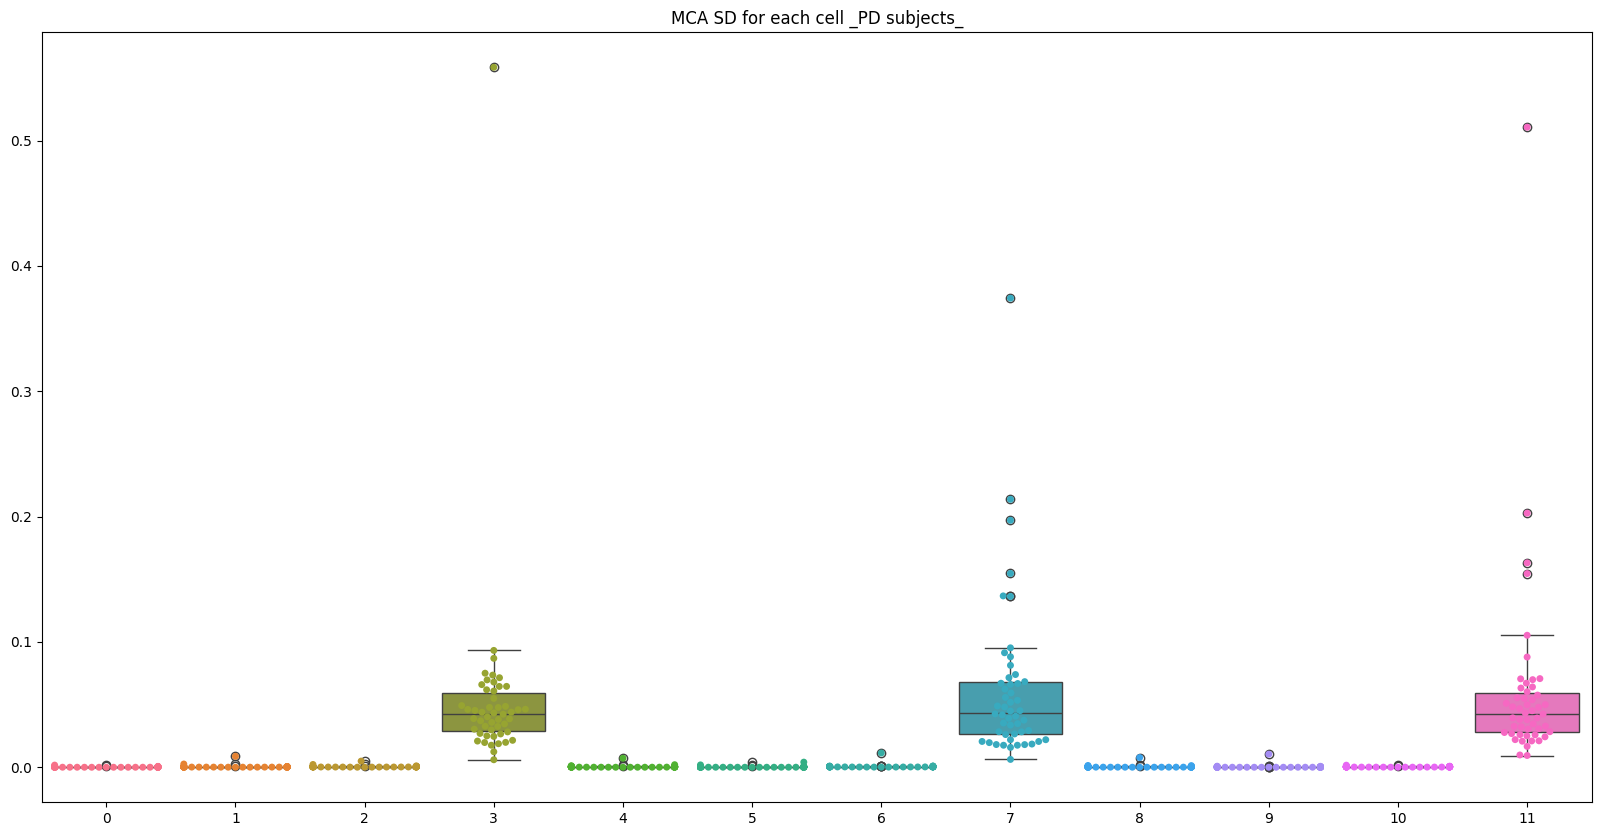

In [35]:
plt.figure(figsize=(20,10))
_ = sns.swarmplot(std_PD[:,:3,:].reshape(50,12))
_ = sns.boxplot(std_PD[:,:3,:].reshape(50,12))
plt.title('MCA SD for each cell _PD subjects_')

Text(0.5, 1.0, 'MCA means for each cell _HC subjects_')

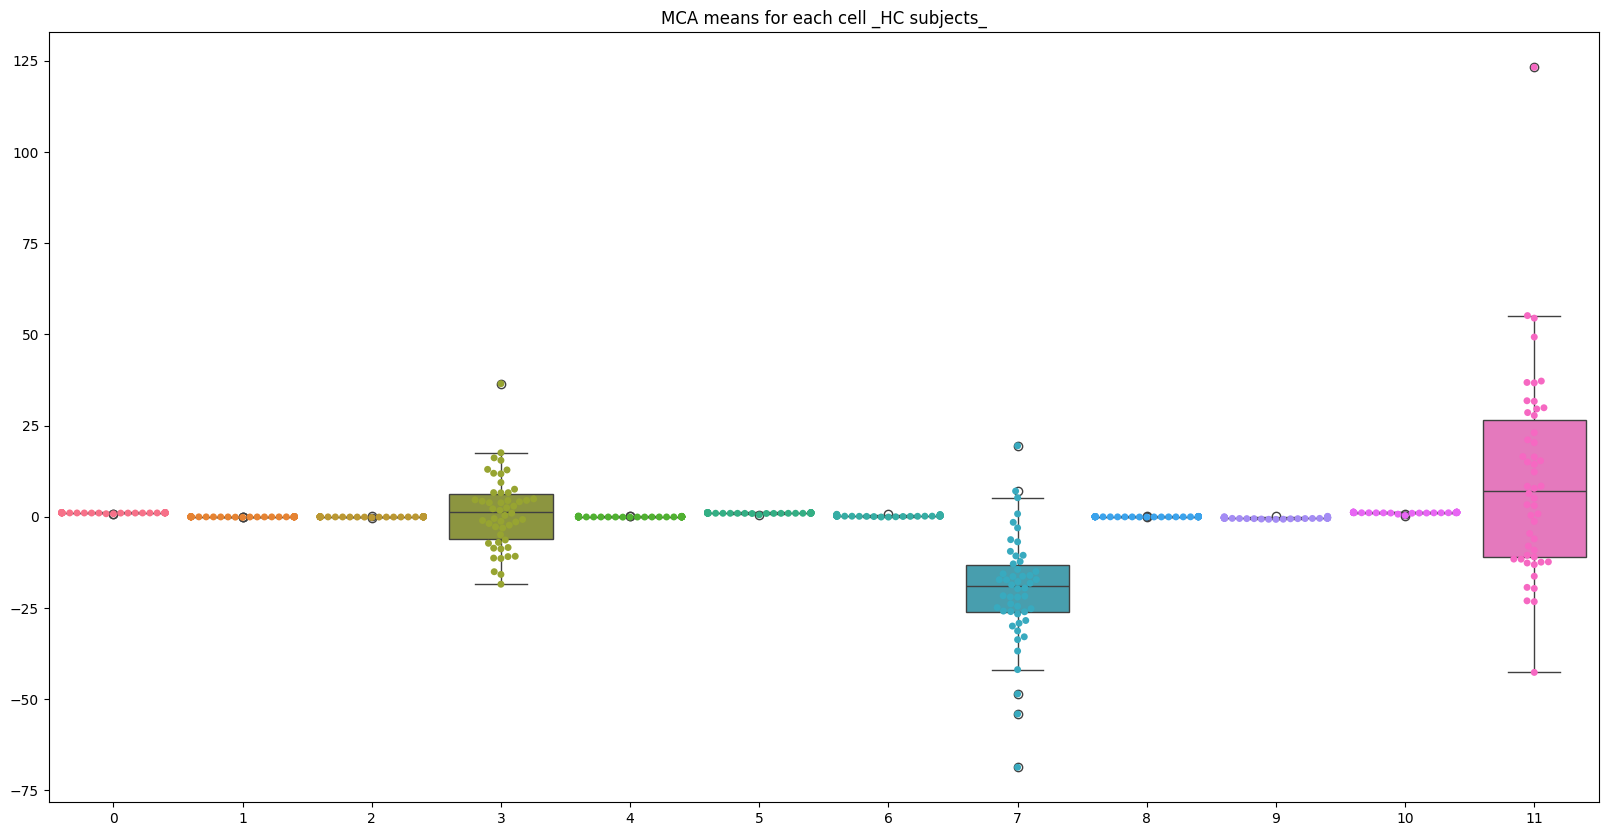

In [36]:
plt.figure(figsize=(20,10))
sns.swarmplot(mean_HC[:,:3,:].reshape(50,12))
sns.boxplot(mean_HC[:,:3,:].reshape(50,12))
plt.title('MCA means for each cell _HC subjects_')

Text(0.5, 1.0, 'MCA sds for each cell _HC subjects_')

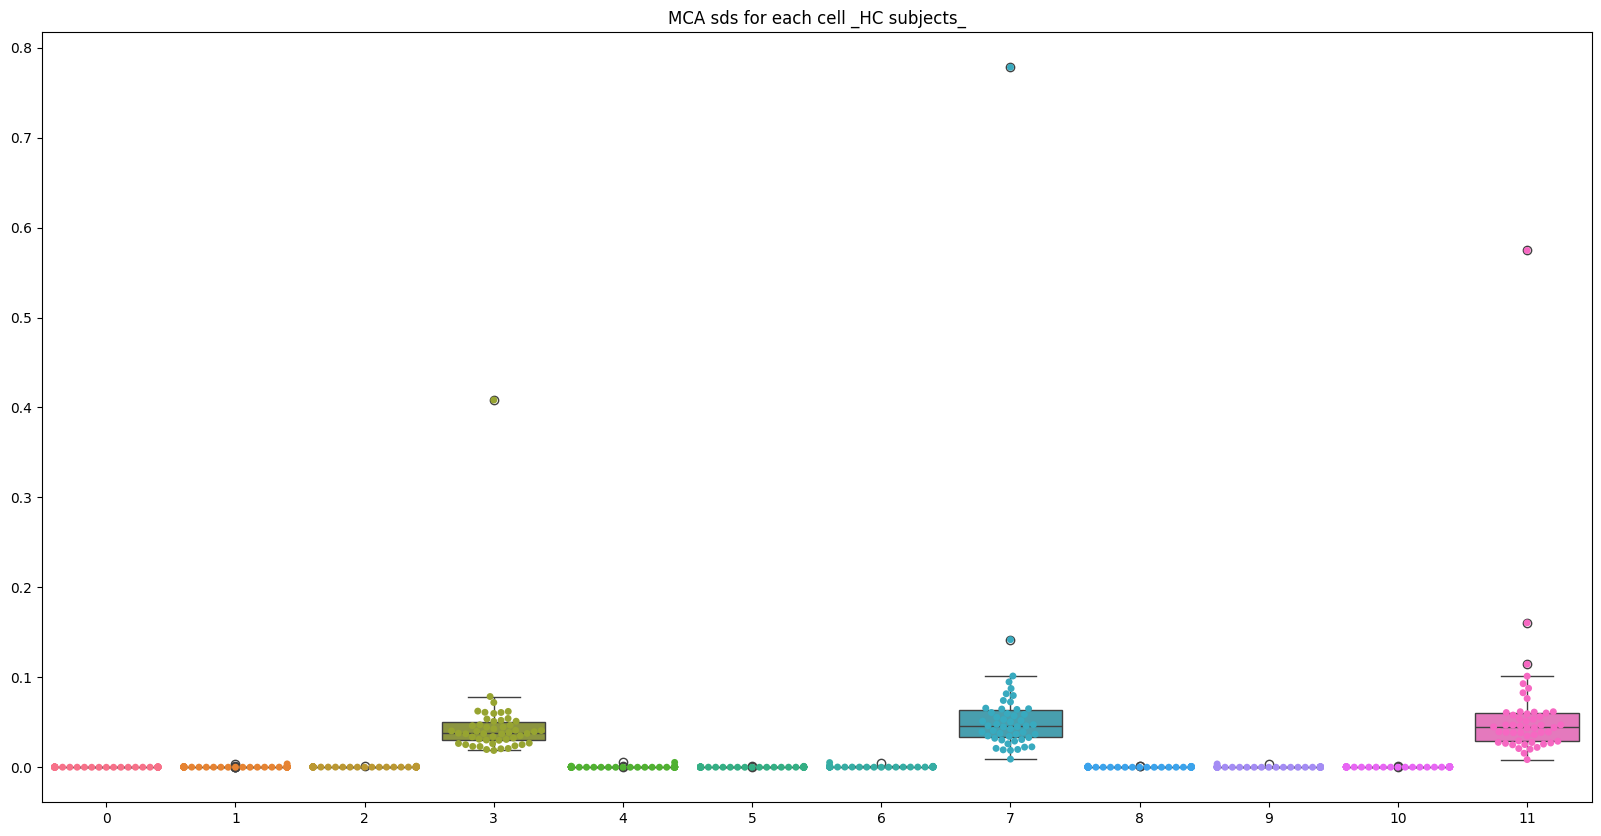

In [37]:
plt.figure(figsize=(20,10))
sns.swarmplot(std_HC[:,:3,:].reshape(50,12))
sns.boxplot(std_HC[:,:3,:].reshape(50,12))
plt.title('MCA sds for each cell _HC subjects_')

Text(0.5, 1.0, 'Significant digits for each cell _PD subjects_')

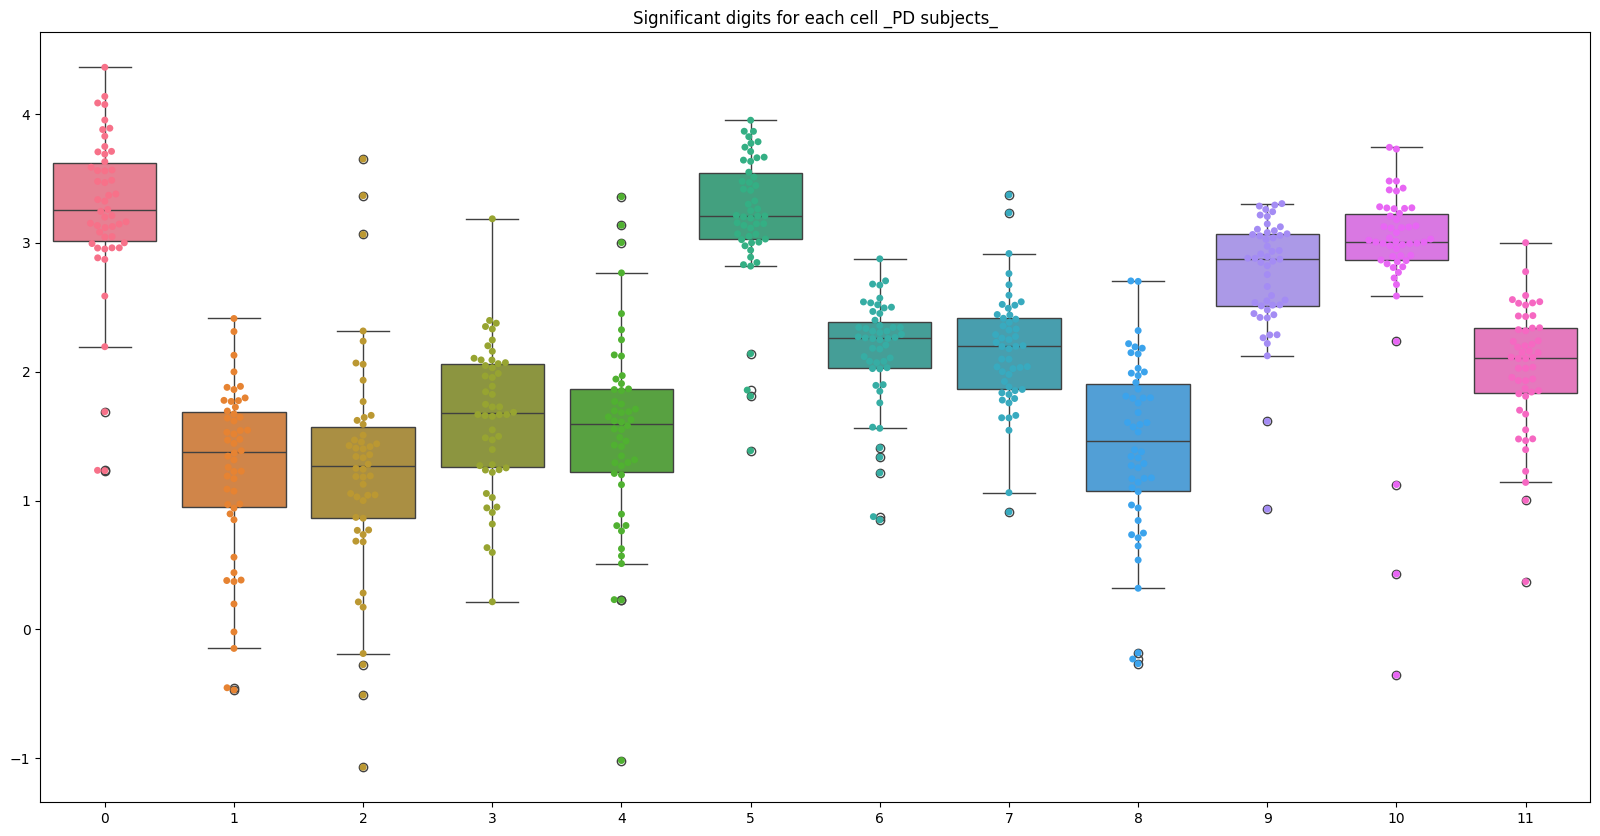

In [38]:
plt.figure(figsize=(20,10))
sns.swarmplot(cell_significant_digits_PD[:,:3,:].reshape(50,12))
sns.boxplot(cell_significant_digits_PD[:,:3,:].reshape(50,12))
plt.title('Significant digits for each cell _PD subjects_')

Text(0.5, 1.0, 'Significant digits for each cell _HC subjects_')

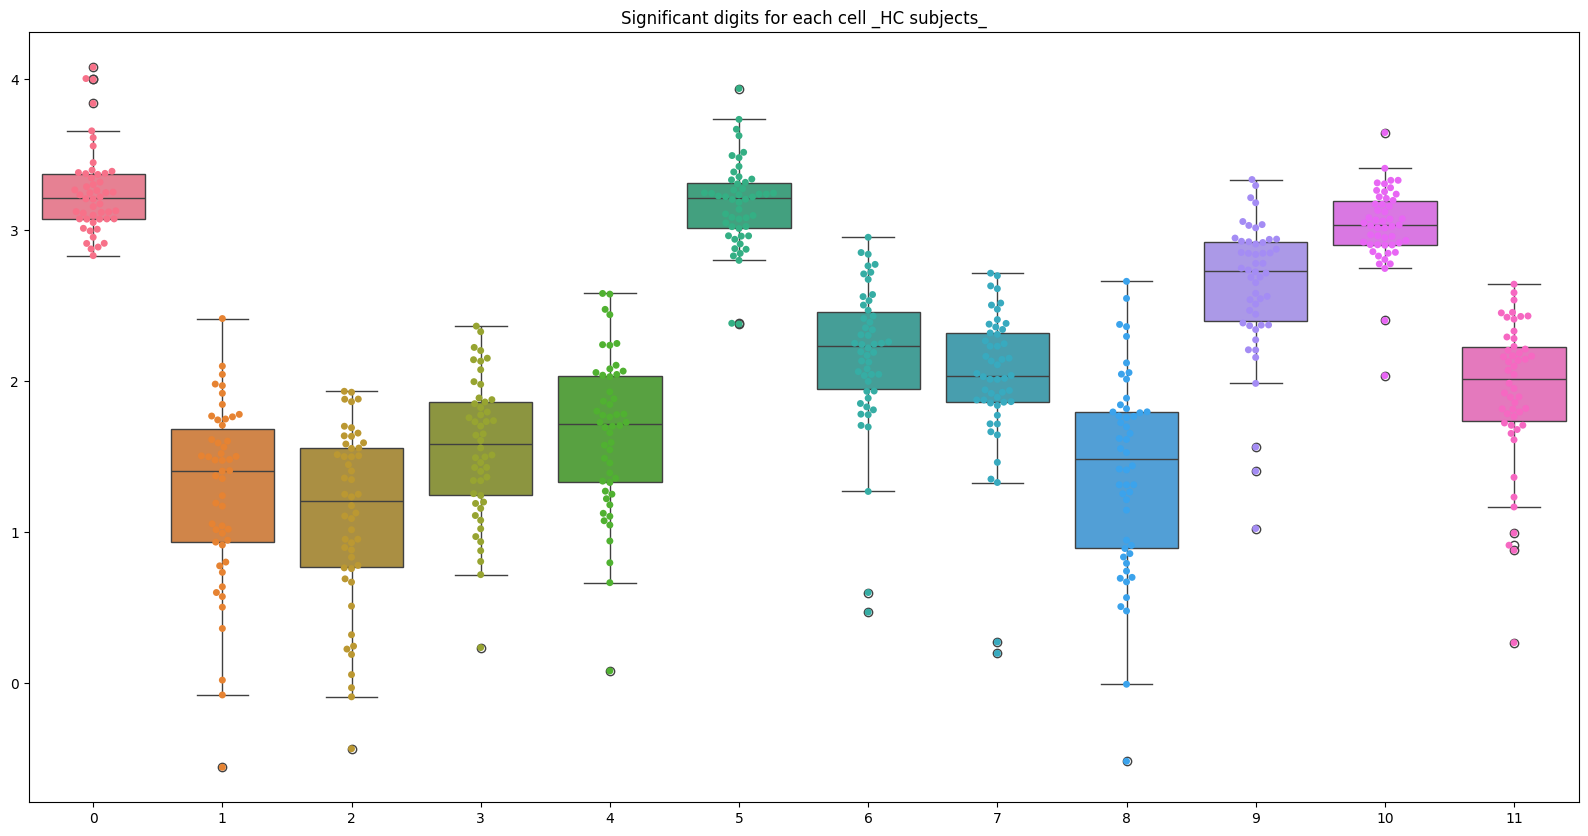

In [39]:
plt.figure(figsize=(20,10))
sns.swarmplot(cell_significant_digits_HC[:,:3,:].reshape(50,12))
sns.boxplot(cell_significant_digits_HC[:,:3,:].reshape(50,12))
plt.title('Significant digits for each cell _HC subjects_')

In [40]:
def transformation_dictionaries_mca(mat_dic, n_mca=10):

    scales_mca_dict = {sub:np.zeros((n_mca, 3)) for sub in mat_dic.keys()}
    translation_mca_dict = {sub:np.zeros((n_mca, 3)) for sub in mat_dic.keys()}
    angels_mca_dict = {sub:np.zeros((n_mca, 3)) for sub in mat_dic.keys()}
    shears_mca_dict = {sub:np.zeros((n_mca, 3)) for sub in mat_dic.keys()}

    for sub in mat_dic.keys():
        for (i,matrix) in enumerate(mat_dic[sub]['mca']):
            scales, translations, angels, shears = affine.decompose(matrix, shears=True, angles=True)
            scales_mca_dict[sub][i] = scales
            translation_mca_dict[sub][i] = translations
            angels_mca_dict[sub][i] = np.array(angels)
            shears_mca_dict[sub][i] = shears
    return scales_mca_dict, translation_mca_dict, angels_mca_dict, shears_mca_dict

In [41]:
def transformation_arrays_ieee(mat_dic):
    n = len(mat_dic.keys())
    scales_ieee = np.zeros((n, 3))
    translations_ieee = np.zeros((n, 3))
    angels_ieee = np.zeros((n, 3))
    shears_ieee = np.zeros((n, 3))

    for i, sub in enumerate(mat_dic.keys()):
        scales_ieee[i], translations_ieee[i], angels_ieee[i], shears_ieee[i] = affine.decompose(mat_dic[sub]['ieee'], shears=True, angles=True)
      
    return scales_ieee, translations_ieee, angels_ieee, shears_ieee
    

In [42]:
# Define the positions for the boxplots
positions_pd = [1]  # Positions for PD
positions_hc = [2]  # Positions for HC


def plotter(data_PD, data_HC, title):
    """
    Plots data for PD and HC.

    Parameters:
    data_PD (numpy.ndarray): The PD data.
    data_HC (numpy.ndarray): The HC data.
    title (str): The title of the plot.
    """
    dims = data_PD.shape[-1]
    num_columns = 3

    for i in range(dims):
        plt.subplot(1, num_columns, i+1)
        
        data = np.column_stack([data_PD[:,i], data_HC[:,i]])

        sns.swarmplot(data)
        sns.boxplot(data, color='white')

        plt.xticks([0,1], ['PD axis ' + str(i+1), 'HC axis '+ str(i+1)])
        
    if dims >= 2:
        plt.title(title, loc='center', pad=-20, fontsize=12)
    else:
        plt.title(title)
    
    plt.show()

In [43]:
scales_ieee_PD, translations_ieee_PD, angels_ieee_PD, shears_ieee_PD = transformation_arrays_ieee(mat_dic_PD)
scales_ieee_HC, translations_ieee_HC, angels_ieee_HC, shears_ieee_HC = transformation_arrays_ieee(mat_dic_HC)

scales_mca_dict_PD, translation_mca_dict_PD, angles_mca_dict_PD, shears_mca_dict_PD = transformation_dictionaries_mca(mat_dic_PD)
scales_mca_dict_HC, translation_mca_dict_HC, angles_mca_dict_HC, shears_mca_dict_HC = transformation_dictionaries_mca(mat_dic_HC)

In [44]:
scales_mca_PD = np.stack([value for value in scales_mca_dict_PD.values()])
scales_mca_HC = np.stack([value for value in scales_mca_dict_HC.values()])

In [45]:
scales_significant_PD = np.stack([sd.significant_digits(scales_mca_PD[i,:,:], reference=np.mean(scales_mca_PD[i,:,:]), axis=0) for i in range(50)])
scales_significant_HC = np.stack([sd.significant_digits(scales_mca_HC[i,:,:], reference=np.mean(scales_mca_HC[i,:,:]), axis=0) for i in range(50)])

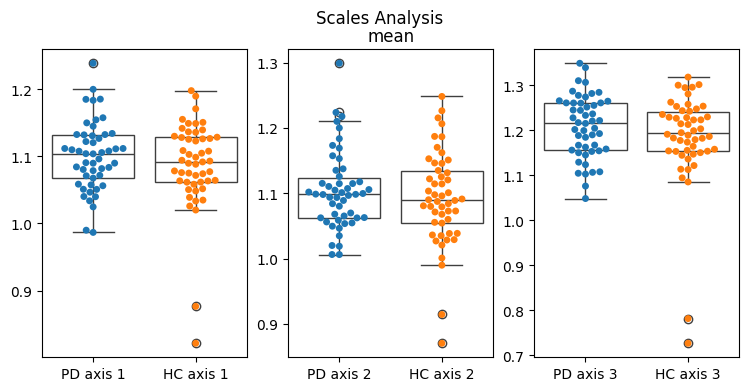

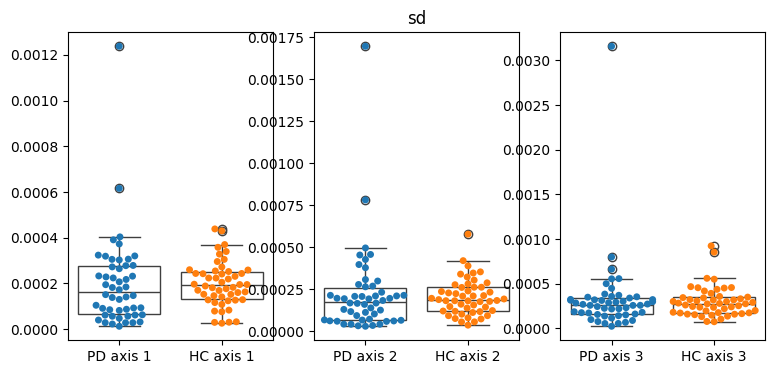

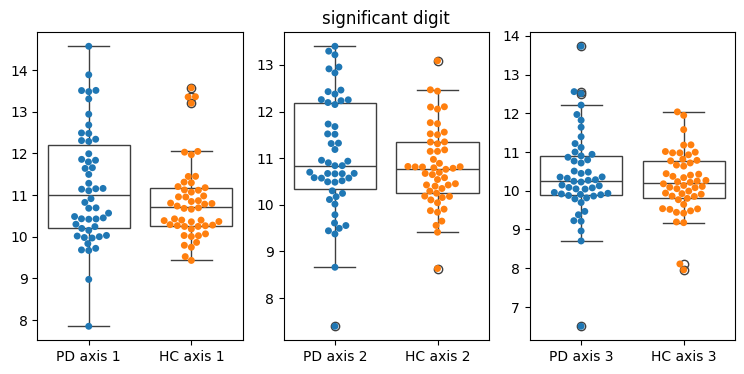

In [46]:
fig = plt.figure(figsize=(9, 4))
fig.suptitle('Scales Analysis')
plotter(np.mean(scales_mca_PD, axis=1),np.mean(scales_mca_HC, axis=1), 'mean')

fig = plt.figure(figsize=(9, 4))
plotter(np.std(scales_mca_PD, axis=1),np.std(scales_mca_HC, axis=1), 'sd')


fig = plt.figure(figsize=(9, 4))
plotter(scales_significant_PD,scales_significant_HC, 'significant digit')



In [47]:
translations_mca_PD = np.stack([value for value in translation_mca_dict_PD.values()])
translations_mca_HC = np.stack([value for value in translation_mca_dict_HC.values()])

In [48]:
translations_significant_PD = np.stack([sd.significant_digits(translations_mca_PD[i,:,:], reference=np.mean(translations_mca_PD[i,:,:]), axis=0) for i in range(50)])
translations_significant_HC = np.stack([sd.significant_digits(translations_mca_HC[i,:,:], reference=np.mean(translations_mca_HC[i,:,:]), axis=0) for i in range(50)])

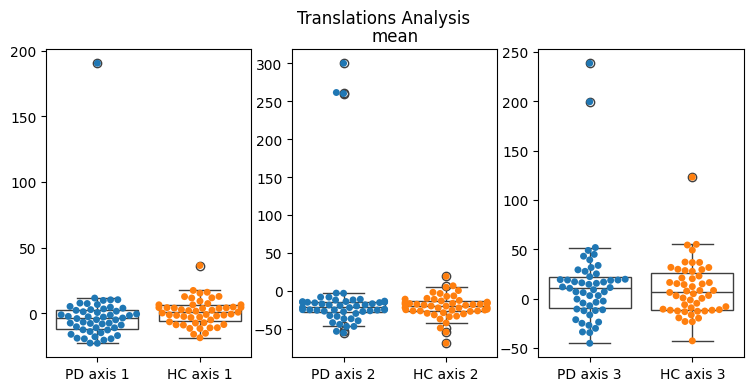

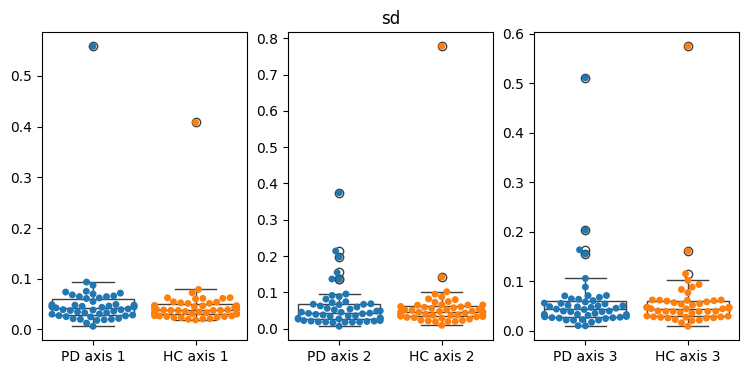

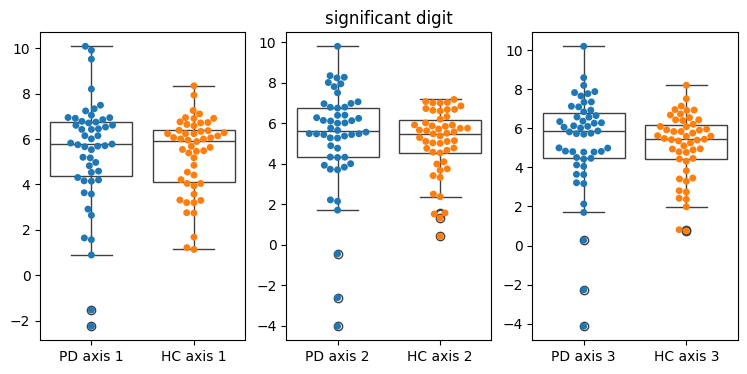

In [49]:
fig = plt.figure(figsize=(9, 4))
fig.suptitle('Translations Analysis')
plotter(np.mean(translations_mca_PD, axis=1),np.mean(translations_mca_HC, axis=1), 'mean')

fig = plt.figure(figsize=(9, 4))
plotter(np.std(translations_mca_PD, axis=1),np.std(translations_mca_HC, axis=1), 'sd')


fig = plt.figure(figsize=(9, 4))
plotter(translations_significant_PD,translations_significant_HC, 'significant digit')



In [50]:
shears_mca_PD = np.stack([value for value in shears_mca_dict_PD.values()])
shears_mca_HC = np.stack([value for value in shears_mca_dict_HC.values()])

In [51]:
shears_significant_PD = np.stack([sd.significant_digits(shears_mca_PD[i,:,:], reference=np.mean(shears_mca_PD[i,:,:]), axis=0) for i in range(50)])
shears_significant_HC = np.stack([sd.significant_digits(shears_mca_HC[i,:,:], reference=np.mean(shears_mca_HC[i,:,:]), axis=0) for i in range(50)])

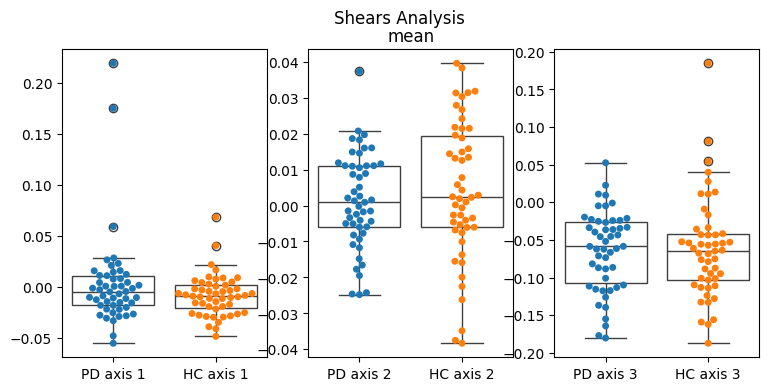

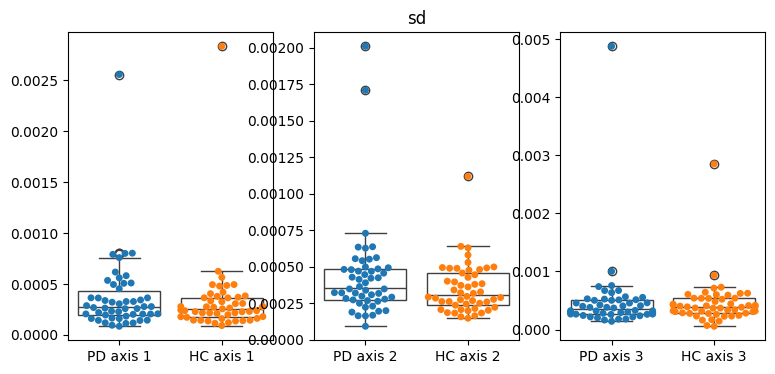

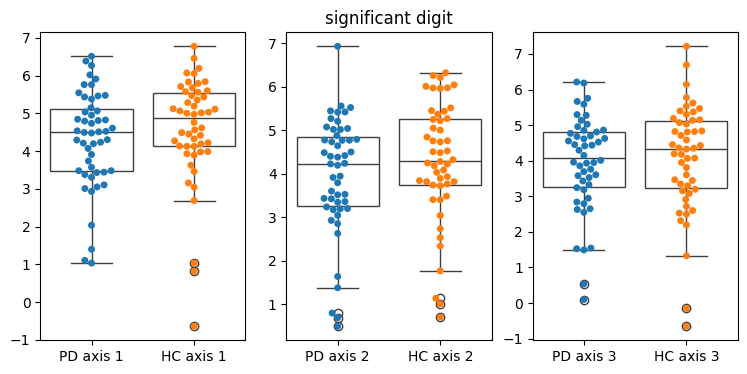

In [52]:

fig = plt.figure(figsize=(9, 4))
fig.suptitle('Shears Analysis')
plotter(np.mean(shears_mca_PD, axis=1),np.mean(shears_mca_HC, axis=1), 'mean')

fig = plt.figure(figsize=(9, 4))
plotter(np.std(shears_mca_PD, axis=1),np.std(shears_mca_HC, axis=1), 'sd')


fig = plt.figure(figsize=(9, 4))
plotter(shears_significant_PD,shears_significant_HC, 'significant digit')


In [53]:
angles_mca_PD = np.degrees(np.stack([value for value in angles_mca_dict_PD.values()]))
angles_mca_HC = np.degrees(np.stack([value for value in angles_mca_dict_HC.values()]))

In [54]:
angles_significant_PD = np.stack([sd.significant_digits(angles_mca_PD[i,:,:], reference=np.mean(angles_mca_PD[i,:,:]), axis=0) for i in range(50)])
angles_significant_HC = np.stack([sd.significant_digits(angles_mca_HC[i,:,:], reference=np.mean(angles_mca_HC[i,:,:]), axis=0) for i in range(50)])

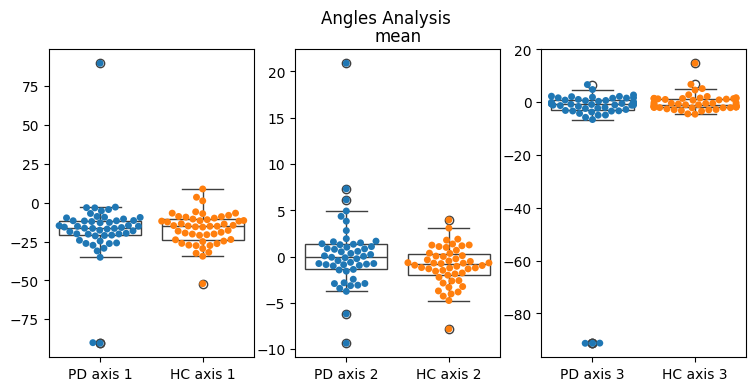

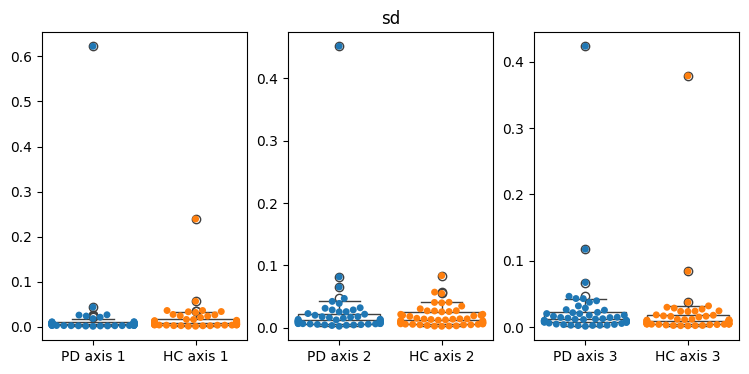

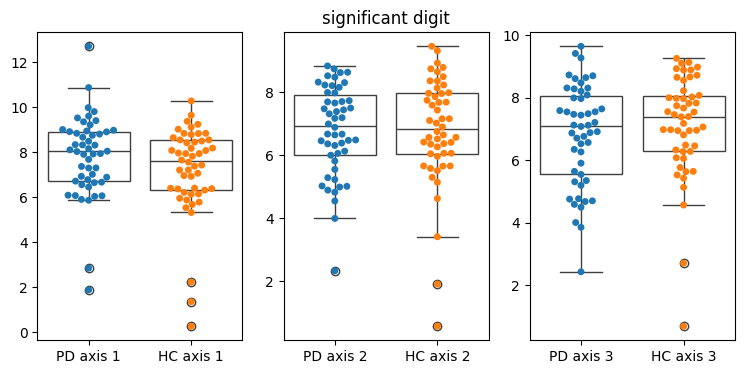

In [55]:

fig = plt.figure(figsize=(9, 4))
fig.suptitle('Angles Analysis')
plotter(np.mean(angles_mca_PD, axis=1),np.mean(angles_mca_HC, axis=1), 'mean')

fig = plt.figure(figsize=(9, 4))
plotter(np.std(angles_mca_PD, axis=1),np.std(angles_mca_HC, axis=1), 'sd')


fig = plt.figure(figsize=(9, 4))
plotter(angles_significant_PD,angles_significant_HC, 'significant digit')


In [122]:
def leargest_indces(array, dict_, n=4):
    largest_idx = np.argsort(array, axis=0)[-n:]
    print(largest_idx.T)
    return np.array(list(dict_.keys()))[largest_idx.T], largest_idx.T

In [57]:
angles_mca_HC_sd = np.std(angles_mca_HC, axis=1)
shears_mca_HC_sd = np.std(shears_mca_HC, axis=1)
translations_mca_HC_sd = np.std(translations_mca_HC, axis=1)
scales_mca_HC_sd = np.std(scales_mca_HC, axis=1)

In [123]:
angels_HC_largest_sd, angels_HC_largest_sd_idx = leargest_indces(angles_mca_HC_sd,angles_mca_dict_HC)
shears_HC_largest_sd, shears_HC_largest_sd_idx = leargest_indces(shears_mca_HC_sd,shears_mca_dict_HC)
translations_HC_largest_sd, translations_HC_largest_sd_idx= leargest_indces(translations_mca_HC_sd,translation_mca_dict_HC)
scales_HC_largest_sd, scales_HC_largest_sd_idx = leargest_indces(scales_mca_HC_sd,scales_mca_dict_HC)

[[49 29 36  4]
 [ 9  6  4 36]
 [38 49 36  4]]
[[ 6 49 36  4]
 [32 48  6  4]
 [13 27 10  4]]
[[ 9 32 30  4]
 [10 13 36  4]
 [ 6 29 36  4]]
[[32 31 28 13]
 [26 16 28  4]
 [ 1 20 36  4]]


In [120]:
all_HC = np.concatenate([angels_HC_largest_sd,shears_HC_largest_sd,translations_HC_largest_sd,scales_HC_largest_sd])

In [60]:
unique_elements_HC, counts_HC = np.unique(np.ravel(all_HC), return_counts=True)

In [61]:
dict(zip(unique_elements_HC,counts_HC))

{'sub-116230': 11,
 'sub-116337': 1,
 'sub-162905': 1,
 'sub-187823': 1,
 'sub-3057': 2,
 'sub-3157': 1,
 'sub-3171': 3,
 'sub-3316': 1,
 'sub-3369': 2,
 'sub-3464': 2,
 'sub-3527': 1,
 'sub-3570': 4,
 'sub-3620': 7,
 'sub-3811': 3,
 'sub-3852': 3,
 'sub-3853': 1,
 'sub-3952': 1,
 'sub-3969': 2,
 'sub-4079': 1}

In [62]:
angles_mca_PD_sd = np.std(angles_mca_PD, axis=1)
shears_mca_PD_sd = np.std(shears_mca_PD, axis=1)
translations_mca_PD_sd = np.std(translations_mca_PD, axis=1)
scales_mca_PD_sd = np.std(scales_mca_PD, axis=1)

In [63]:
angels_PD_largest_sd = leargest_indces(angles_mca_PD_sd,angles_mca_dict_PD)
shears_PD_largest_sd = leargest_indces(shears_mca_PD_sd,shears_mca_dict_PD)
translations_PD_largest_sd = leargest_indces(translations_mca_PD_sd,translation_mca_dict_PD)
scales_PD_largest_sd = leargest_indces(scales_mca_PD_sd,scales_mca_dict_PD)

[[38 35 37  5]
 [41 48 38  5]
 [41 32 38  5]]
[[41 31 32  5]
 [43 41 38  5]
 [31 43 46  5]]
[[ 8 43 38  5]
 [31 38 48  5]
 [38 48 31  5]]
[[17 27 38  5]
 [47 27 31  5]
 [41 14 18  5]]


In [64]:
all_PD = np.concatenate([angels_PD_largest_sd,shears_PD_largest_sd,translations_PD_largest_sd,scales_PD_largest_sd])

In [65]:
unique_elements_PD, counts_PD = np.unique(np.ravel(all_PD), return_counts=True)

In [66]:
dict(zip(unique_elements_PD,counts_PD))

{'sub-106703': 1,
 'sub-120403': 1,
 'sub-121830': 8,
 'sub-3120': 1,
 'sub-3127': 1,
 'sub-3365': 1,
 'sub-3403': 12,
 'sub-3505': 2,
 'sub-3700': 3,
 'sub-3709': 5,
 'sub-3777': 3,
 'sub-3823': 1,
 'sub-3960': 1,
 'sub-3970': 5,
 'sub-4121': 1,
 'sub-54144': 2}

In [67]:
#some thing like correlation but for catgorical variables

In [68]:
def jaccard_similarity(arr1, arr2):

    set1 = set(arr1)
    set2 = set(arr2)

    return len(set1.intersection(set2)) / len(set1.union(set2))


In [69]:
def frequency_vectors(arr1, arr2):

    counter1 = Counter(arr1)
    counter2 = Counter(arr2)

    all_categories = set(list(arr1)+ list(arr2))

    vector1 = [counter1[category] if category in counter1 else 0 for category in all_categories]
    vector2 = [counter2[category] if category in counter2 else 0 for category in all_categories]

    return vector1, vector2

In [70]:
def Cosine_similarity(A, B):
 
    dot_product = np.dot(A, B)

    norm_A = np.linalg.norm(A)
    norm_B = np.linalg.norm(B)

    cos_sim = dot_product / (norm_A * norm_B)
    
    return cos_sim


In [71]:
from itertools import combinations

def print_metrics(groups, all_ravel):

    a = [i for i in range(len(groups))]
    combos = list(combinations(a,2))

    for i in range(len(combos)):

        g1 , g2 = combos[i][0], combos[i][1]
        print(f"{groups[g1]} vs {groups[g2]}")

        vector1, vector2 = frequency_vectors(all_ravel[g1],all_ravel[g2])
        
        print(f"cosine similarity: {Cosine_similarity(vector1, vector2) :4f}")

        print(f"jaccard similarity: {jaccard_similarity(all_ravel[g1],all_ravel[g2]) :4f}")

        print("*********\n")


In [72]:
groups = ['angels', 'shears', 'translations', 'scales']
all_ravel_HC = [np.ravel(angels_HC_largest_sd),np.ravel(shears_HC_largest_sd),np.ravel(translations_HC_largest_sd),np.ravel(scales_HC_largest_sd)]
all_ravel_PD = [np.ravel(angels_PD_largest_sd),np.ravel(shears_PD_largest_sd),np.ravel(translations_PD_largest_sd),np.ravel(scales_PD_largest_sd)]

In [73]:
print_metrics(groups, all_ravel_HC)

angels vs shears
cosine similarity: 0.701646
jaccard similarity: 0.333333
*********

angels vs translations
cosine similarity: 0.789352
jaccard similarity: 0.454545
*********

angels vs scales
cosine similarity: 0.441261
jaccard similarity: 0.133333
*********

shears vs translations
cosine similarity: 0.800000
jaccard similarity: 0.500000
*********

shears vs scales
cosine similarity: 0.503115
jaccard similarity: 0.266667
*********

translations vs scales
cosine similarity: 0.559017
jaccard similarity: 0.266667
*********



In [74]:
print_metrics(groups, all_ravel_PD)

angels vs shears
cosine similarity: 0.680545
jaccard similarity: 0.400000
*********

angels vs translations
cosine similarity: 0.741249
jaccard similarity: 0.300000
*********

angels vs scales
cosine similarity: 0.613941
jaccard similarity: 0.230769
*********

shears vs translations
cosine similarity: 0.694365
jaccard similarity: 0.444444
*********

shears vs scales
cosine similarity: 0.639010
jaccard similarity: 0.333333
*********

translations vs scales
cosine similarity: 0.591608
jaccard similarity: 0.250000
*********



In [75]:
angles_mca_HC_mean = np.mean(angles_mca_HC, axis=1)
shears_mca_HC_mean = np.mean(shears_mca_HC, axis=1)
translations_mca_HC_mean = np.mean(translations_mca_HC, axis=1)
scales_mca_HC_mean = np.mean(scales_mca_HC, axis=1)

In [76]:
def framewise_displacement(translation, rotation, previous_translation=np.array([0,0,0]), previous_angles=np.array([0,0,0]), r=50):

    d_translation = np.sqrt(np.sum((translation-previous_translation)**2))
    d_rotation = (r*np.pi/180) * np.sqrt(np.sum((rotation-previous_angles)**2))

    return d_rotation + d_translation
     

In [77]:
#look to how vectorize it maybe
result_HC = np.zeros((50,10))
for i in range(50):
    for j in range(10):
        result_HC[i,j] = framewise_displacement(translations_mca_HC[i,j], angles_mca_HC[i,j], translations_ieee_HC[i], angels_ieee_HC[i])

In [78]:
result_PD = np.zeros((50,10))
for i in range(50):
    for j in range(10):
        result_PD[i,j] = framewise_displacement(translations_mca_PD[i,j], angles_mca_PD[i,j], translations_ieee_PD[i], angels_ieee_PD[i])

In [79]:
fd_mean_HC = np.mean(result_HC, axis=1)
fd_sd_HC = np.std(result_HC, axis=1)

In [80]:
fd_mean_PD = np.mean(result_PD, axis=1)
fd_sd_PD = np.std(result_PD, axis=1)

In [81]:
fd_significant_digits_PD = np.array([sd.significant_digits(result_PD[i], reference=fd_mean_PD[i], basis=10) for i in range(50)])

In [82]:
fd_significant_digits_HC = np.array([sd.significant_digits(result_HC[i], reference=fd_mean_HC[i], basis=10) for i in range(50)])

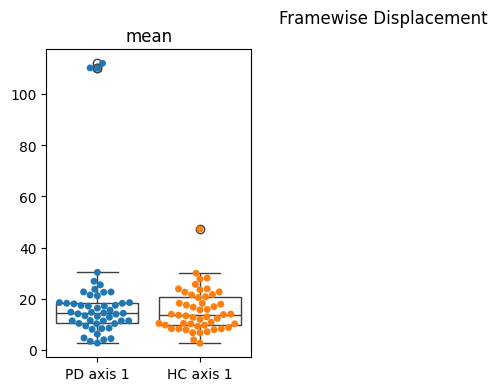

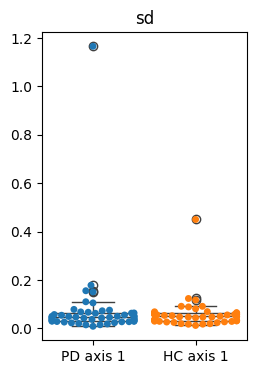

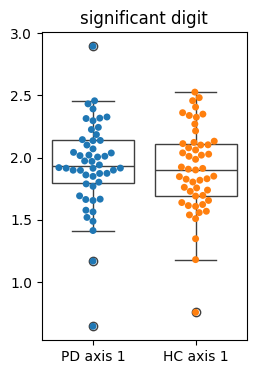

In [83]:
fig = plt.figure(figsize=(9, 4))
fig.suptitle('Framewise Displacement')
plotter(fd_mean_PD.reshape(-1,1),fd_mean_HC.reshape(-1,1), 'mean')

fig = plt.figure(figsize=(9, 4))
plotter(fd_sd_PD.reshape(-1,1),fd_sd_HC.reshape(-1,1), 'sd')


fig = plt.figure(figsize=(9, 4))
plotter(fd_significant_digits_PD.reshape(-1,1),fd_significant_digits_HC.reshape(-1,1), 'significant digit')


In [84]:
ants_path_HC = Path("./pipline/hc/outputs/ants/anat-12dofs")
ants_path_PD = Path("./pipline/pd/outputs/ants/anat-12dofs")

In [85]:
ants_paths_HC = transformation.get_matrices_paths(ants_path_HC, Path("./HC_selected_subjects.txt"),  pattern="_ses-BL0GenericAffine")
ants_paths_PD = transformation.get_matrices_paths(ants_path_PD, Path("./PD_selected_subjects.txt"),  pattern="_ses-BL0GenericAffine")

In [86]:
import importlib
importlib.reload(transformation)

<module 'transformation' from '/lustre06/project/6061841/niusham/mca_linear_registration/transformation.py'>

In [87]:
ants_mat_dic_HC, ants_error_HC = transformation.get_matrices(ants_paths_HC)
ants_mat_dic_HC = {key.replace('GenericAffine', ''): value for key, value in ants_mat_dic_HC.items()}

ants_mat_dic_PD, ants_error_PD = transformation.get_matrices(ants_paths_PD)
ants_mat_dic_PD = {key.replace('GenericAffine', ''): value for key, value in ants_mat_dic_PD.items()}

In [88]:
ants_error_PD, ants_error_HC

([], [])

In [89]:
ants_scales_ieee_PD, ants_translations_ieee_PD, ants_angels_ieee_PD, ants_shears_ieee_PD = transformation_arrays_ieee(ants_mat_dic_PD)
ants_scales_ieee_HC, ants_translations_ieee_HC, ants_angels_ieee_HC, ants_shears_ieee_HC = transformation_arrays_ieee(ants_mat_dic_HC)

ants_scales_mca_dict_PD, ants_translation_mca_dict_PD, ants_angles_mca_dict_PD, ants_shears_mca_dict_PD = transformation_dictionaries_mca(ants_mat_dic_PD)
ants_scales_mca_dict_HC, ants_translation_mca_dict_HC, ants_angles_mca_dict_HC, ants_shears_mca_dict_HC = transformation_dictionaries_mca(ants_mat_dic_HC)

In [90]:
ants_scales_mca_PD = np.stack([value for value in ants_scales_mca_dict_PD.values()])
ants_scales_mca_HC = np.stack([value for value in ants_scales_mca_dict_HC.values()])

ants_scales_significant_PD = np.stack([sd.significant_digits(ants_scales_mca_PD[i,:,:], reference=np.mean(ants_scales_mca_PD[i,:,:]), axis=0) for i in range(50)])
ants_scales_significant_HC = np.stack([sd.significant_digits(ants_scales_mca_HC[i,:,:], reference=np.mean(ants_scales_mca_HC[i,:,:]), axis=0) for i in range(50)])

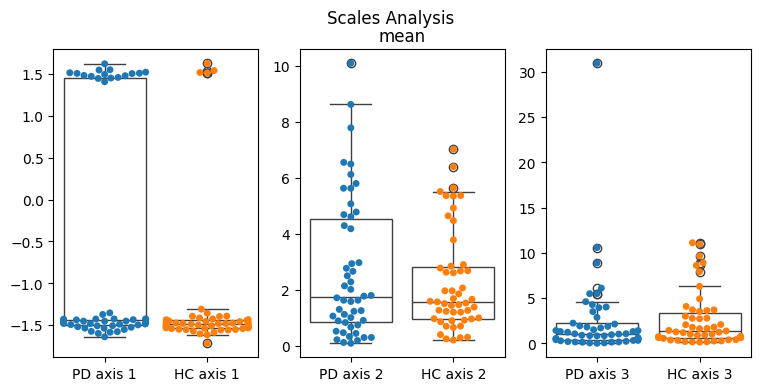

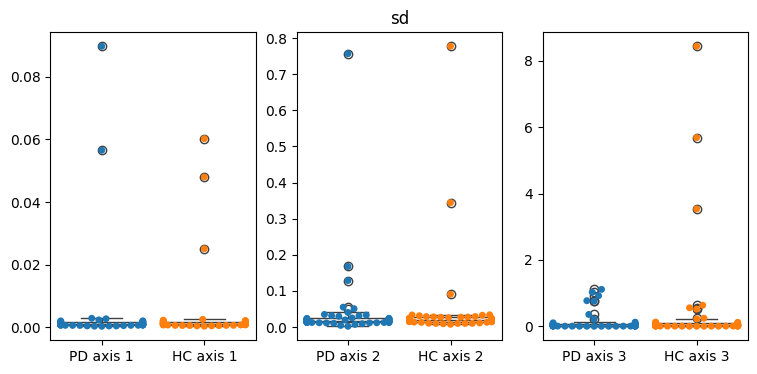

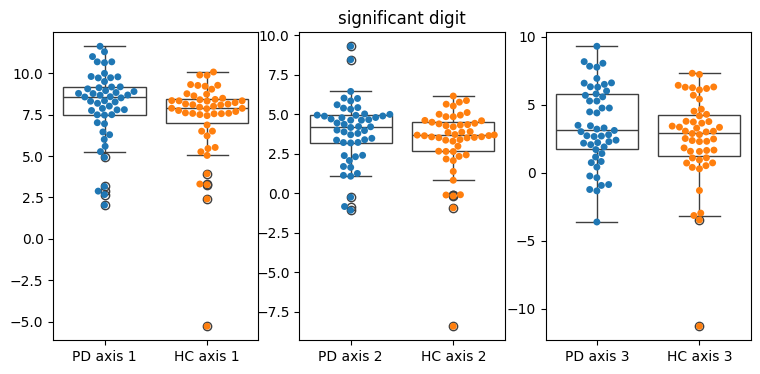

In [91]:
fig = plt.figure(figsize=(9, 4))
fig.suptitle('Scales Analysis')
plotter(np.mean(ants_scales_mca_PD, axis=1),np.mean(ants_scales_mca_HC, axis=1), 'mean')

fig = plt.figure(figsize=(9, 4))
plotter(np.std(ants_scales_mca_PD, axis=1),np.std(ants_scales_mca_HC, axis=1), 'sd')


fig = plt.figure(figsize=(9, 4))
plotter(ants_scales_significant_PD,ants_scales_significant_HC, 'significant digit')



In [92]:
ants_translations_mca_PD = np.stack([value for value in ants_translation_mca_dict_PD.values()])
ants_translations_mca_HC = np.stack([value for value in ants_translation_mca_dict_HC.values()])

ants_translations_significant_PD = np.stack([sd.significant_digits(ants_translations_mca_PD[i,:,:], reference=np.mean(ants_translations_mca_PD[i,:,:]), axis=0) for i in range(50)])
ants_translations_significant_HC = np.stack([sd.significant_digits(ants_translations_mca_HC[i,:,:], reference=np.mean(ants_translations_mca_HC[i,:,:]), axis=0) for i in range(50)])

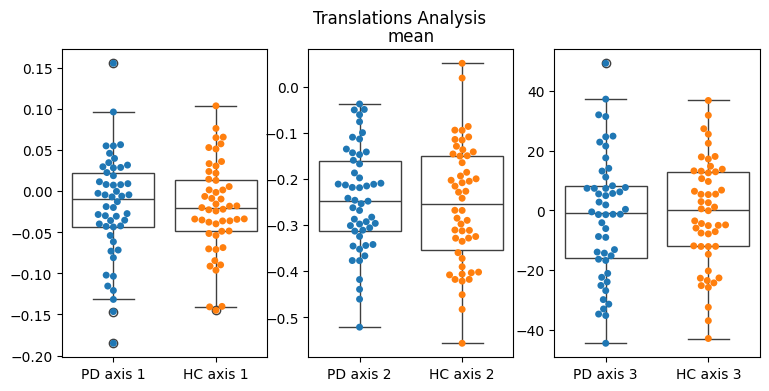

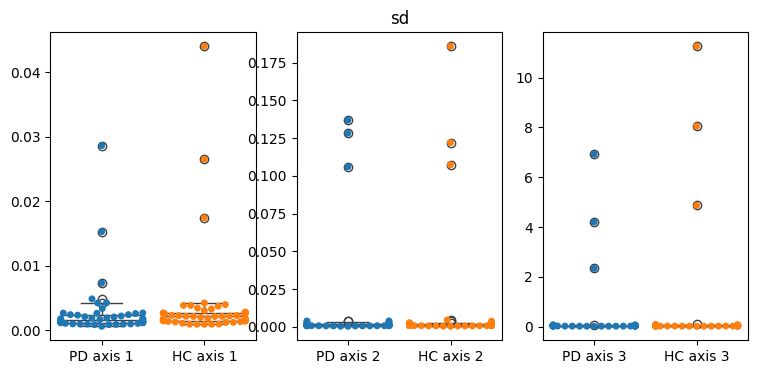

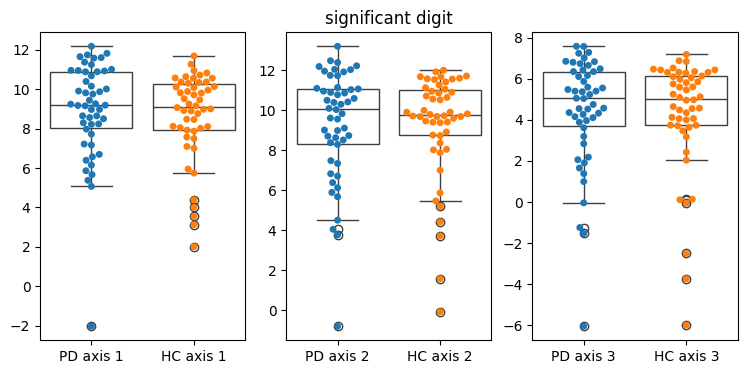

In [93]:
fig = plt.figure(figsize=(9, 4))
fig.suptitle('Translations Analysis')
plotter(np.mean(ants_translations_mca_PD, axis=1),np.mean(ants_translations_mca_HC, axis=1), 'mean')

fig = plt.figure(figsize=(9, 4))
plotter(np.std(ants_translations_mca_PD, axis=1),np.std(ants_translations_mca_HC, axis=1), 'sd')


fig = plt.figure(figsize=(9, 4))
plotter(ants_translations_significant_PD,ants_translations_significant_HC, 'significant digit')



In [94]:
ants_shears_mca_PD = np.stack([value for value in ants_shears_mca_dict_PD.values()])
ants_shears_mca_HC = np.stack([value for value in ants_shears_mca_dict_HC.values()])
ants_shears_significant_PD = np.stack([sd.significant_digits(ants_shears_mca_PD[i,:,:], reference=np.mean(ants_shears_mca_PD[i,:,:]), axis=0) for i in range(50)])
ants_shears_significant_HC = np.stack([sd.significant_digits(ants_shears_mca_HC[i,:,:], reference=np.mean(ants_shears_mca_HC[i,:,:]), axis=0) for i in range(50)])

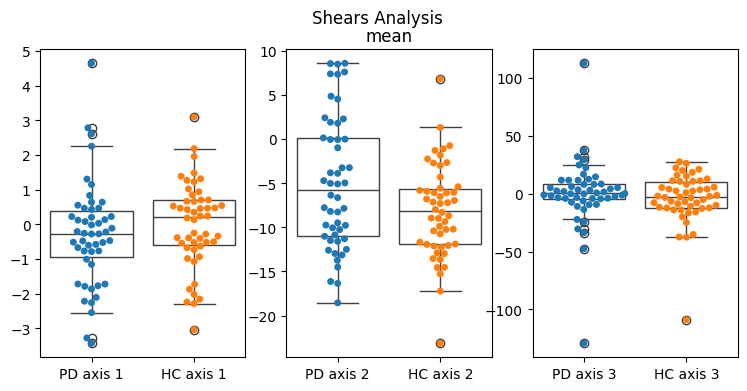

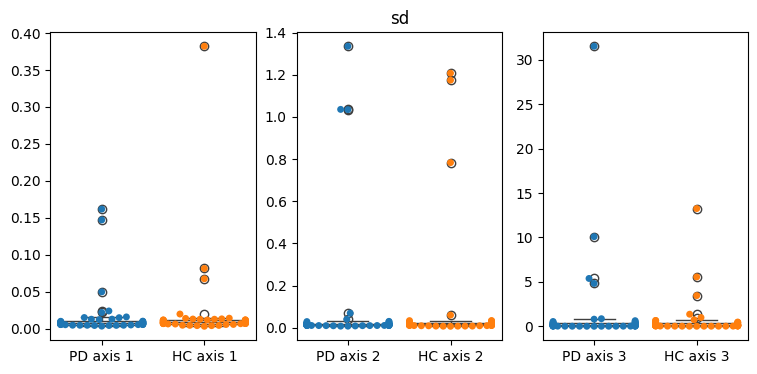

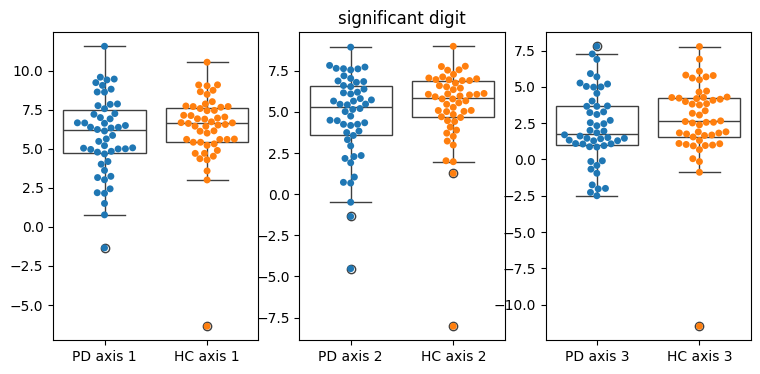

In [95]:

fig = plt.figure(figsize=(9, 4))
fig.suptitle('Shears Analysis')
plotter(np.mean(ants_shears_mca_PD, axis=1),np.mean(ants_shears_mca_HC, axis=1), 'mean')

fig = plt.figure(figsize=(9, 4))
plotter(np.std(ants_shears_mca_PD, axis=1),np.std(ants_shears_mca_HC, axis=1), 'sd')


fig = plt.figure(figsize=(9, 4))
plotter(ants_shears_significant_PD,ants_shears_significant_HC, 'significant digit')


In [96]:
ants_angles_mca_PD = np.degrees(np.stack([value for value in ants_angles_mca_dict_PD.values()]))
ants_angles_mca_HC = np.degrees(np.stack([value for value in ants_angles_mca_dict_HC.values()]))

ants_angles_significant_PD = np.stack([sd.significant_digits(ants_angles_mca_PD[i,:,:], reference=np.mean(ants_angles_mca_PD[i,:,:]), axis=0) for i in range(50)])
ants_angles_significant_HC = np.stack([sd.significant_digits(ants_angles_mca_HC[i,:,:], reference=np.mean(ants_angles_mca_HC[i,:,:]), axis=0) for i in range(50)])

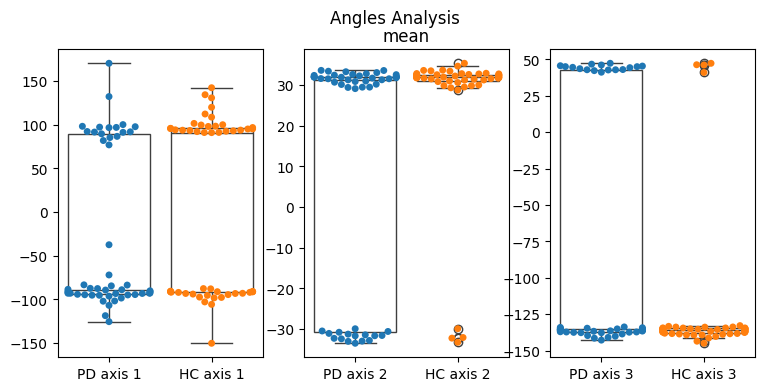

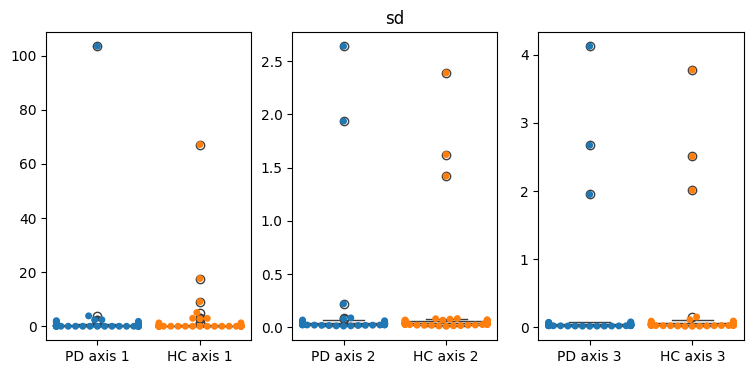

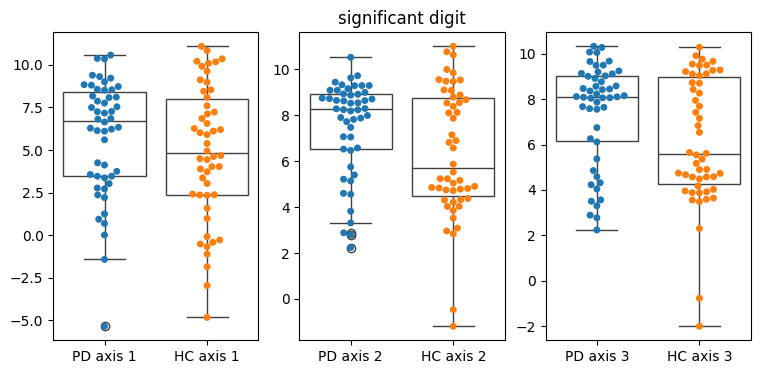

In [97]:

fig = plt.figure(figsize=(9, 4))
fig.suptitle('Angles Analysis')
plotter(np.mean(ants_angles_mca_PD, axis=1),np.mean(ants_angles_mca_HC, axis=1), 'mean')

fig = plt.figure(figsize=(9, 4))
plotter(np.std(ants_angles_mca_PD, axis=1),np.std(ants_angles_mca_HC, axis=1), 'sd')


fig = plt.figure(figsize=(9, 4))
plotter(ants_angles_significant_PD,ants_angles_significant_HC, 'significant digit')


In [124]:
ants_angles_mca_HC_sd = np.std(ants_angles_mca_HC, axis=1)
ants_shears_mca_HC_sd = np.std(ants_shears_mca_HC, axis=1)
ants_translations_mca_HC_sd = np.std(ants_translations_mca_HC, axis=1)
ants_scales_mca_HC_sd = np.std(ants_scales_mca_HC, axis=1)

ants_angels_HC_largest_sd, ants_angels_HC_largest_sd_idx = leargest_indces(ants_angles_mca_HC_sd,ants_angles_mca_dict_HC)
ants_shears_HC_largest_sd, ants_shears_HC_largest_sd_idx = leargest_indces(ants_shears_mca_HC_sd,ants_shears_mca_dict_HC)
ants_translations_HC_largest_sd, ants_translations_HC_largest_sd_idx = leargest_indces(ants_translations_mca_HC_sd,ants_translation_mca_dict_HC)
ants_scales_HC_largest_sd, ants_scales_HC_largest_sd_idx = leargest_indces(ants_scales_mca_HC_sd,ants_scales_mca_dict_HC)

[[35  4 10 36]
 [37 10  4 36]
 [41  4 10 36]]
[[ 3 10  4 36]
 [31  4 10 36]
 [10  4 23 36]]
[[31 10  4 36]
 [31  4 10 36]
 [16 10  4 36]]
[[48 10 36  4]
 [38 10  4 36]
 [23  4 36 10]]


In [99]:
ants_all_HC = np.concatenate([ants_angels_HC_largest_sd,ants_shears_HC_largest_sd,ants_translations_HC_largest_sd,ants_scales_HC_largest_sd])
ants_unique_elements_HC, ants_counts_HC = np.unique(np.ravel(ants_all_HC), return_counts=True)
dict(zip(ants_unique_elements_HC,ants_counts_HC))

{'sub-116230': 12,
 'sub-3157': 1,
 'sub-3316': 1,
 'sub-3370': 2,
 'sub-3389': 1,
 'sub-3414': 1,
 'sub-3620': 12,
 'sub-3765': 1,
 'sub-3952': 3,
 'sub-3969': 12,
 'sub-4067': 1,
 'sub-4079': 1}

In [100]:
ants_angles_mca_PD_sd = np.std(ants_angles_mca_PD, axis=1)
ants_shears_mca_PD_sd = np.std(ants_shears_mca_PD, axis=1)
ants_translations_mca_PD_sd = np.std(ants_translations_mca_PD, axis=1)
ants_scales_mca_PD_sd = np.std(ants_scales_mca_PD, axis=1)

ants_angels_PD_largest_sd = leargest_indces(ants_angles_mca_PD_sd,ants_angles_mca_dict_PD)
ants_shears_PD_largest_sd = leargest_indces(ants_shears_mca_PD_sd,ants_shears_mca_dict_PD)
ants_translations_PD_largest_sd = leargest_indces(ants_translations_mca_PD_sd,ants_translation_mca_dict_PD)
ants_scales_PD_largest_sd = leargest_indces(ants_scales_mca_PD_sd,ants_scales_mca_dict_PD)

[[18 12 35  3]
 [17 18 11 15]
 [24 11 15 18]]
[[43 18 11 15]
 [17 18 15 11]
 [17 35  5  3]]
[[ 5 15 11 18]
 [ 5 18 15 11]
 [24 11 18 15]]
[[24 15 18 11]
 [43 18 11 15]
 [17 11  3  5]]


In [101]:
ants_all_PD = np.concatenate([ants_angels_PD_largest_sd,ants_shears_PD_largest_sd,ants_translations_PD_largest_sd,ants_scales_PD_largest_sd])
ants_unique_elements_PD, ants_counts_PD = np.unique(np.ravel(ants_all_PD), return_counts=True)
dict(zip(ants_unique_elements_PD,ants_counts_PD))

{'sub-120403': 2,
 'sub-171635': 1,
 'sub-3001': 3,
 'sub-3176': 3,
 'sub-3365': 10,
 'sub-3403': 4,
 'sub-3586': 10,
 'sub-3777': 2,
 'sub-3960': 4,
 'sub-42264': 9}

In [102]:
groups = ['angels', 'shears', 'translations', 'scales']
ants_all_ravel_HC = [np.ravel(ants_angels_HC_largest_sd),np.ravel(ants_shears_HC_largest_sd),np.ravel(ants_translations_HC_largest_sd),np.ravel(ants_scales_HC_largest_sd)]
ants_all_ravel_PD = [np.ravel(ants_angels_PD_largest_sd),np.ravel(ants_shears_PD_largest_sd),np.ravel(ants_translations_PD_largest_sd),np.ravel(ants_scales_PD_largest_sd)]

In [103]:
print_metrics(groups, ants_all_ravel_HC)

angels vs shears
cosine similarity: 0.900000
jaccard similarity: 0.333333
*********

angels vs translations
cosine similarity: 0.871421
jaccard similarity: 0.375000
*********

angels vs scales
cosine similarity: 0.900000
jaccard similarity: 0.333333
*********

shears vs translations
cosine similarity: 0.935971
jaccard similarity: 0.571429
*********

shears vs scales
cosine similarity: 0.933333
jaccard similarity: 0.500000
*********

translations vs scales
cosine similarity: 0.871421
jaccard similarity: 0.375000
*********



In [104]:
print_metrics(groups, ants_all_ravel_PD)

angels vs shears
cosine similarity: 0.858116
jaccard similarity: 0.600000
*********

angels vs translations
cosine similarity: 0.829156
jaccard similarity: 0.444444
*********

angels vs scales
cosine similarity: 0.863636
jaccard similarity: 0.600000
*********

shears vs translations
cosine similarity: 0.790569
jaccard similarity: 0.444444
*********

shears vs scales
cosine similarity: 0.905789
jaccard similarity: 0.777778
*********

translations vs scales
cosine similarity: 0.904534
jaccard similarity: 0.625000
*********



In [105]:
#look to how vectorize it maybe
ants_result_HC = np.zeros((50,10))
for i in range(50):
    for j in range(10):
        ants_result_HC[i,j] = framewise_displacement(ants_translations_mca_HC[i,j], ants_angles_mca_HC[i,j], ants_translations_ieee_HC[i], ants_angels_ieee_HC[i])
ants_result_PD = np.zeros((50,10))
for i in range(50):
    for j in range(10):
        ants_result_PD[i,j] = framewise_displacement(ants_translations_mca_PD[i,j], ants_angles_mca_PD[i,j], ants_translations_ieee_PD[i], ants_angels_ieee_PD[i])

In [106]:
ants_fd_mean_HC = np.mean(ants_result_HC, axis=1)
ants_fd_sd_HC = np.std(ants_result_HC, axis=1)

ants_fd_mean_PD = np.mean(ants_result_PD, axis=1)
ants_fd_sd_PD = np.std(ants_result_PD, axis=1)

ants_fd_significant_digits_PD = np.array([sd.significant_digits(ants_result_PD[i], reference=ants_fd_mean_PD[i], basis=10) for i in range(50)])
ants_fd_significant_digits_HC = np.array([sd.significant_digits(ants_result_HC[i], reference=ants_fd_mean_HC[i], basis=10) for i in range(50)])

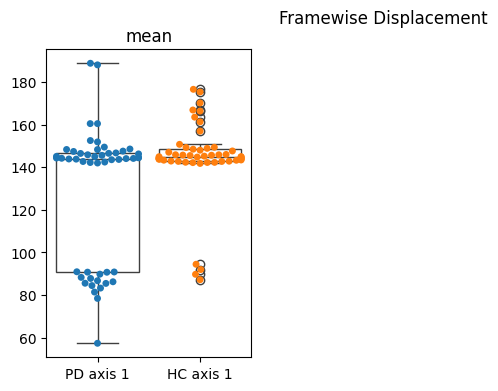

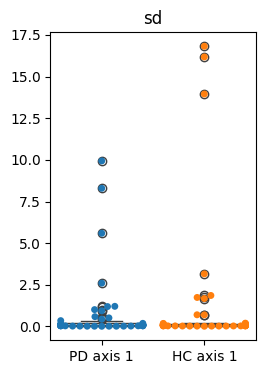

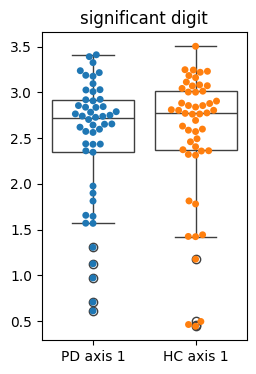

In [107]:
fig = plt.figure(figsize=(9, 4))
fig.suptitle('Framewise Displacement')
plotter(ants_fd_mean_PD.reshape(-1,1),ants_fd_mean_HC.reshape(-1,1), 'mean')

fig = plt.figure(figsize=(9, 4))
plotter(ants_fd_sd_PD.reshape(-1,1),ants_fd_sd_HC.reshape(-1,1), 'sd')


fig = plt.figure(figsize=(9, 4))
plotter(ants_fd_significant_digits_PD.reshape(-1,1),ants_fd_significant_digits_HC.reshape(-1,1), 'significant digit')


In [112]:
angles_mca = np.mod(angles_mca_HC, 2 * np.pi)
angles_ieee = np.mod(angels_ieee_HC, 2 * np.pi)

In [ ]:
framewise_displacement(translations_mca_HC, angles_mca, transla)

In [113]:
ants_result_HC = np.zeros((50,10))
for i in range(50):
    for j in range(10):
        ants_result_HC[i,j] = framewise_displacement(ants_translations_mca_HC[i,j], angles_mca[i,j], ants_translations_ieee_HC[i], angles_ieee[i])

In [114]:
ants_result_HC

array([[ 4.75232704,  4.7036768 ,  4.72180296,  4.69308872,  4.65469425,
         4.72223122,  4.74568452,  4.62835713,  4.67011577,  4.71961484],
       [ 2.95375825,  3.04759712,  3.00305923,  2.98906035,  3.018352  ,
         3.01992568,  3.01115226,  3.05484231,  3.04018181,  3.02648918],
       [ 3.41666246,  3.34085007,  3.39481016,  3.47601702,  3.35343355,
         3.42706783,  3.41324609,  3.40147516,  3.40954091,  3.38097894],
       [ 4.91648691,  4.90672374,  4.93076481,  4.8962145 ,  4.95544909,
         4.93499356,  4.9209909 ,  4.96575118,  4.9027296 ,  4.90450498],
       [ 2.64668691,  2.49749687, 13.28480415, 20.07719368,  2.74422626,
         2.90836301, 14.94481006,  3.27577038,  2.6552265 , 24.5283993 ],
       [ 2.71583201,  2.70383806,  2.69523677,  2.70337515,  2.71892767,
         2.69828363,  2.71108143,  2.69248743,  2.68870259,  2.68573649],
       [ 2.19084691,  2.23191596,  2.21518206,  2.24893088,  2.17171026,
         2.14748168,  2.19344275,  2.33844566

In [128]:
ants_all_HC_idx = np.concatenate([ants_angels_HC_largest_sd_idx,ants_shears_HC_largest_sd_idx,ants_translations_HC_largest_sd_idx,ants_scales_HC_largest_sd_idx])

In [129]:
all_HC_idx = np.concatenate([angels_HC_largest_sd_idx,shears_HC_largest_sd_idx,translations_HC_largest_sd_idx,scales_HC_largest_sd_idx])

In [117]:
jaccard_similarity(np.ravel(ants_all_HC), np.ravel(all_HC))

0.2916666666666667

In [130]:
Cosine_similarity(np.ravel(ants_all_HC_idx), np.ravel(all_HC_idx))

0.5692973792998272

In [119]:
np.ravel(ants_all_HC)

array(['sub-4067', 'sub-116230', 'sub-3969', 'sub-3620', 'sub-3389',
       'sub-3969', 'sub-116230', 'sub-3620', 'sub-3414', 'sub-116230',
       'sub-3969', 'sub-3620', 'sub-3765', 'sub-3969', 'sub-116230',
       'sub-3620', 'sub-3952', 'sub-116230', 'sub-3969', 'sub-3620',
       'sub-3969', 'sub-116230', 'sub-3370', 'sub-3620', 'sub-3952',
       'sub-3969', 'sub-116230', 'sub-3620', 'sub-3952', 'sub-116230',
       'sub-3969', 'sub-3620', 'sub-3316', 'sub-3969', 'sub-116230',
       'sub-3620', 'sub-3157', 'sub-3969', 'sub-3620', 'sub-116230',
       'sub-4079', 'sub-3969', 'sub-116230', 'sub-3620', 'sub-3370',
       'sub-116230', 'sub-3620', 'sub-3969'], dtype='<U10')